In [1]:
# Declaracion de librerias 
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Preparacion de las etiquetas, el dataset, y cargado del modelo para generar los datos para la matriz
names = ['Carne 1','Carne 2','Carne 3','Carne 4','Carne 5',
         'Carne 6','Carne 7','Carne 8']
test_data_dir = './CarneDataset/train'  
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(100, 100), 
    batch_size = 10,
    class_mode='categorical', 
    shuffle=False)
custom_Model= load_model("./modelo/model.h5")
predictions = custom_Model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

Found 1634 images belonging to 8 classes.
164/164 [==============================] - 23s 139ms/step


In [3]:
#Creacion de la matriz de confucion
matc=confusion_matrix(y_real, y_pred)

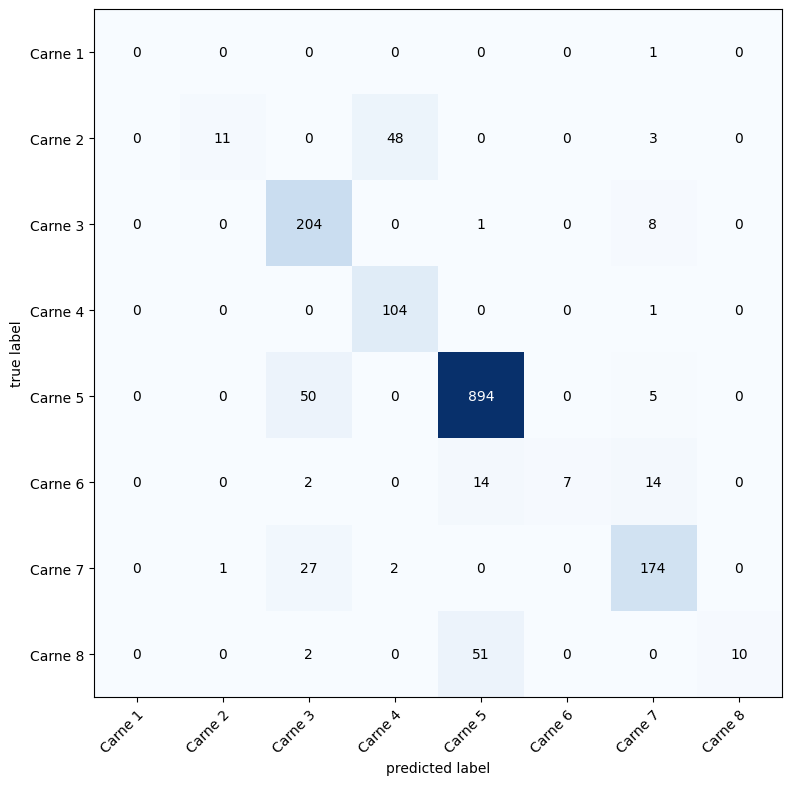

In [4]:
#Visualizacion de la matriz de confusion 
plot_confusion_matrix(conf_mat=matc, figsize=(8,8), class_names = names, show_normed=False)
plt.tight_layout()

In [5]:
#Impresion de metricas generadas por la matriz segun las clases existentes en el dataset
print(metrics.classification_report(y_real, y_pred, digits=2, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      0.18      0.30        62
           2       0.72      0.96      0.82       213
           3       0.68      0.99      0.80       105
           4       0.93      0.94      0.94       949
           5       1.00      0.19      0.32        37
           6       0.84      0.85      0.85       204
           7       1.00      0.16      0.27        63

    accuracy                           0.86      1634
   macro avg       0.76      0.53      0.54      1634
weighted avg       0.88      0.86      0.84      1634

